EXPLORATORY DATA ANALSIS: HYPOTHESIS TESTING


In [2]:
import pandas as pd
import numpy as np
#Dressbarn EDA file
POS=pd.read_csv(r'C:\Users\SrishtiNagu\Desktop\DDRS12\CAPSTONE\DATA\cleaned_data\Outlier_treated_POS.csv')

Making a copy of original POS

In [3]:
POS1=POS.copy()

In [4]:
POS1['date']=POS1['date'].astype('datetime64[ns]')

to add month and year 

In [5]:
POS1=POS1.assign(year = POS1['date'].dt.year,month = POS1['date'].dt.strftime('%b'))


1) HYPOTHESIS: DEMAND IS SEASONAL: MONTH VS SALES

In [24]:
sales_month=POS1.groupby(["year", "month"],as_index=False)["sales"].sum()

In [ ]:
sales_month.to_csv(r'C:\Users\SrishtiNagu\Desktop\DDRS12\CAPSTONE\DATA\cleaned_data\data_sales_month.csv',index = False)

Merging new promo+holiday column(2 in 1) 10.12.21

In [7]:
HolidayPromo_final1=pd.read_csv(r'C:\Users\SrishtiNagu\Desktop\DDRS12\CAPSTONE\DATA\cleaned_data\holiday_promo_final1.csv')

In [8]:
HolidayPromo_final1['date']=HolidayPromo_final1['date'].astype('datetime64[ns]')

In [9]:
POS2=POS1.copy()

In [16]:
POS2=POS2.merge(HolidayPromo_final1,on='date',how='left')

In [19]:
POS2['holiday_name']= POS2['holiday_name'].fillna(0)

In [20]:
POS2['holiday_name'] = POS2['holiday_name'].astype(int)

In [25]:
holiday_promo_sales=POS2.groupby(["year", "holiday_name"],as_index=False)["sales"].sum()

In [26]:
holiday_promo_units=POS2.groupby(["year", "holiday_name"],as_index=False)["units"].sum()

In [ ]:
holiday_promo_units.to_csv(r'C:\Users\SrishtiNagu\Desktop\DDRS12\CAPSTONE\DATA\cleaned_data\data_holiday_promo_units.csv',index = False)

In [93]:
holiday_promo_sales.to_csv(r'C:\Users\SrishtiNagu\Desktop\DDRS12\CAPSTONE\DATA\cleaned_data\data_holiday_promo_sales.csv',index = False)

2) HYPOTHESIS:HOLIDAYS OUT-PERFORM NORMAL DAYS IN TERMS OF SALES AND UNITS

In [6]:
holiday_sales=POS1.groupby(["year", "holiday_name"],as_index=False)["sales"].mean()

In [132]:
holiday_units=df_POS1.groupby(["year", "holiday_name"],as_index=False)["units"].mean()

In [133]:
holiday_units

,year,holiday_name,units
0,2015,0,1.044873
1,2015,1,1.053308
2,2016,0,1.050035
3,2016,1,1.051851
4,2017,0,1.060314
5,2017,1,1.063067
6,2018,0,1.072487
7,2018,1,1.077281


In [141]:
holiday_units.to_csv(r'C:\Users\SrishtiNagu\Desktop\DDRS12\CAPSTONE\DATA\cleaned_data\data_holiday_units.csv',index = False)

In [142]:
holiday_sales.to_csv(r'C:\Users\SrishtiNagu\Desktop\DDRS12\CAPSTONE\DATA\cleaned_data\data_holiday_sales.csv',index = False)

In [146]:
sales_month.to_csv(r'C:\Users\SrishtiNagu\Desktop\DDRS12\CAPSTONE\DATA\cleaned_data\data_sales_month.csv',index = False)

3) HYPOTHESIS: STORE TYPE AFFECTS PURCHASE DECISIONS

In [149]:
df_storetype_sales.to_csv(r'C:\Users\SrishtiNagu\Desktop\DDRS12\CAPSTONE\DATA\cleaned_data\data_storetype_sales.csv',index = False)

4) HYPOTHESIS: LARGER THE STORE SIZE, LARGER THE NUMBER OF UNITS SOLD

In [8]:
storesize_units=POS1.groupby(["store_size"],as_index=False)["units"].sum()

In [154]:
storesize_units.to_csv(r'C:\Users\SrishtiNagu\Desktop\DDRS12\CAPSTONE\DATA\cleaned_data\data_storesize_units.csv',index = False)

<Figure size 1080x360 with 0 Axes>

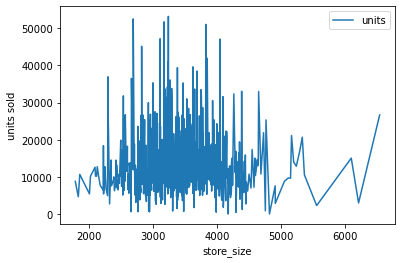

In [9]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(15,5))
storesize_units.plot(x='store_size', y = 'units', kind='line')
plt.ylabel('units sold')
plt.show()

5) HYPOTHESIS: LARGER THE STORE SIZE, LARGER THE SALES

In [11]:
storesize_sales=POS1.groupby(["store_size"],as_index=False)["sales"].sum()

In [159]:
storesize_sales.to_csv(r'C:\Users\SrishtiNagu\Desktop\DDRS12\CAPSTONE\DATA\cleaned_data\data_storesize_sales.csv',index = False)

<Figure size 1080x360 with 0 Axes>

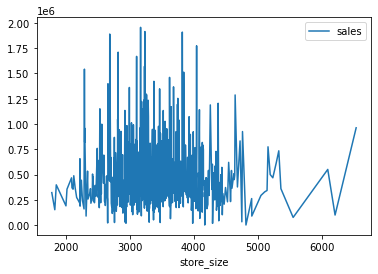

In [12]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(15,5))
storesize_sales.plot(x='store_size', y = 'sales', kind='line')

plt.show()

6) HYPOTHESIS: STATE WITH LARGEST NUMBER OF STORES HAS THE HIGHEST SALES

In [14]:
state_stores=POS1.groupby(["state"],as_index=False)["store_id"].describe()

In [15]:
state_stores=POS1[['state','store_id']].groupby(["state"]).nunique()['store_id'].sort_values(ascending=False)

In [164]:
state_stores.to_csv(r'C:\Users\SrishtiNagu\Desktop\DDRS12\CAPSTONE\DATA\cleaned_data\data_state_stores.csv',index = False)

In [165]:
state_sales=POS1[['state','sales']].groupby('state').sum()['sales'].sort_values(ascending=False)

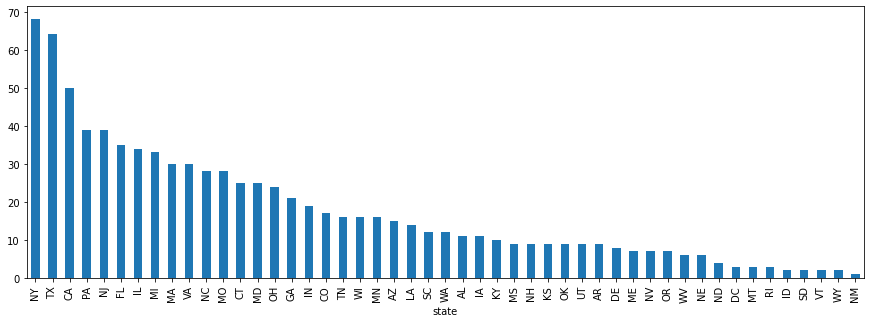

In [16]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(15,5))
POS1[['state','store_id']].groupby(["state"]).nunique()['store_id'].sort_values(ascending=False).plot(kind='bar')

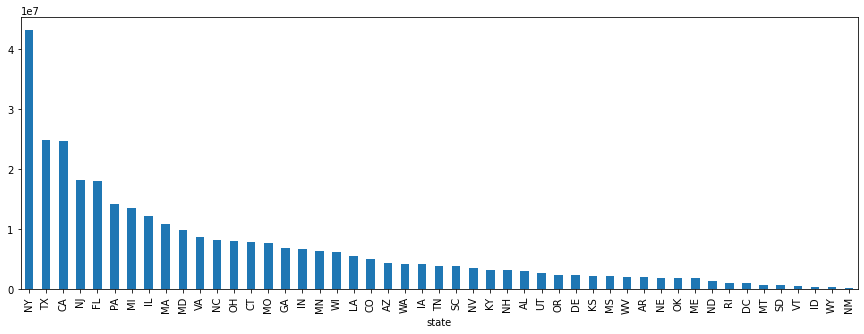

In [167]:
plt.figure(figsize=(15,5))
POS1[['state','sales']].groupby('state').sum()['sales'].sort_values(ascending=False).plot(kind='bar')

In [17]:
POS1[POS1['store_id']==1024].groupby(['state']).count()

,date,store_id,sku_id,online_flag,sales,units,margin,cost_price,sales_d,margin_d,...,percentage_race_asian,percentage_race_native_indian,disposable_income_per_capita,median_household_income,total_searches,holiday_name,promotion_text,fp_nfp,year,month
state,,,,,,,,,,,,,,,,,,,,,
WI,4030,4030,4030,4030,4030,4030,4030,4030,4030,4030,...,4030,4030,4030,4030,4030,4030,4030,4030,4030,4030


In [170]:
## HYPOTHESIS: HIGHER THE FEMALE POPULATION, HIGHER THE SALES

7) HIGHER THE DISPOSABLE INCOME, HIGHER THE SALES

In [18]:
disincome_sales=POS1.groupby(["state", "disposable_income_per_capita"],as_index=False)["sales"].sum()


In [177]:
disincome_sales.to_csv(r'C:\Users\SrishtiNagu\Desktop\DDRS12\CAPSTONE\DATA\cleaned_data\data_disincome_sales.csv',index = False)

Checking different class names in Dressbarn

In [19]:
POS1['class_name'].unique()

array(['SPECIAL OCCASION DAY', 'REFINED DRESSES',
       'SPECIAL OCCASION SEPARATES', 'SPECIAL OCCASION EVENING',
       'CASUAL DRESSES', 'DUMMY CLASS'], dtype=object)

8. HYPOTHESIS: WHICH IS THE HIGHEST SELLING GARMENT 

In [20]:
class_margin=POS1.groupby(["class_name"],as_index=False)["margin"].sum()

In [21]:
class_margin

,class_name,margin
0,CASUAL DRESSES,1.593036e+07
1,DUMMY CLASS,1.396256e+04
2,REFINED DRESSES,7.852378e+07
3,SPECIAL OCCASION DAY,2.459621e+07
4,SPECIAL OCCASION EVENING,4.240055e+07
5,SPECIAL OCCASION SEPARATES,1.491492e+07


In [184]:
class_sales=POS1.groupby(["class_name"],as_index=False)["sales"].sum()

In [185]:
class_sales

,class_name,sales
0,CASUAL DRESSES,3.095544e+07
1,DUMMY CLASS,1.475068e+05
2,REFINED DRESSES,1.463683e+08
3,SPECIAL OCCASION DAY,4.601368e+07
4,SPECIAL OCCASION EVENING,7.670571e+07
5,SPECIAL OCCASION SEPARATES,2.693480e+07


In [186]:
class_margin.to_csv(r'C:\Users\SrishtiNagu\Desktop\DDRS12\CAPSTONE\DATA\cleaned_data\data_class_margin.csv',index = False)

Check: HIGHEST SALES FOR WHICH SUBCLASS

In [188]:
POS3=POS1[(df_POS1['class_name']=='REFINED DRESSES')]

In [23]:
POS1['subclass_name'].unique()

array(['WOVENS', 'TOPS', 'LACE', 'KNITS', 'JACKETS', 'BOTTOMS',
       'DUMMY SUBCLASS'], dtype=object)

In [24]:
POS1['subclass'].unique()

array([31, 21, 50, 32, 20, 40, 41, 52, 30, 51,  6, 42,  5, 99],
      dtype=int64)

In [26]:
POS3=POS1[(POS1['subclass_name']=='WOVENS')]

In [27]:
POS3['subclass_name'].nunique()

1

In [28]:
subclass_margin=POS1.groupby(["subclass_name"],as_index=False)["margin"].sum()

In [192]:
subclass_margin.to_csv(r"C:\Users\SrishtiNagu\Desktop\DDRS12\CAPSTONE\DATA\cleaned_data\data_subclass_margin.csv")

FASHION PYRAMID

In [29]:
POS1['fashion_pyramid'].unique()

array(['Fashion_Driver', 'Trend', 'Core', 'Misc'], dtype=object)

In [30]:
fashion_only=POS1.groupby(["fashion_pyramid"],as_index=False)["units"].sum()

In [196]:
fashion_only.to_csv(r"C:\Users\SrishtiNagu\Desktop\DDRS12\CAPSTONE\DATA\cleaned_data\data_fashion_only.csv")

REGION

In [31]:
POS1['region'].unique()

array(['REGION 6', 'REGION 5', 'REGION 1', 'REGION 7', 'REGION 3',
       'REGION 10', 'REGION 9'], dtype=object)

In [ ]:
region=POS1.groupby(["region"],as_index=False)["sales"].sum()

In [ ]:
region.to_csv(r"C:\Users\SrishtiNagu\Desktop\DDRS12\CAPSTONE\DATA\cleaned_data\data_region.csv")

PROMOTION SALES---final promotion 

In [32]:
POS1['promotion_text'].unique()

array([0, 1], dtype=int64)

In [94]:
promotion_units=POS1.groupby(["year", "promotion_text"],as_index=False)["units"].sum()

In [95]:
promotion_units

,year,promotion_text,units
0,2015,0,1159572.0
1,2015,1,101926.0
2,2016,0,3027340.0
3,2016,1,284004.0
4,2017,0,2770647.0
5,2017,1,290043.0
6,2018,0,1337529.0
7,2018,1,155990.0


In [76]:
promotion_units.to_csv(r"C:\Users\SrishtiNagu\Desktop\DDRS12\CAPSTONE\DATA\cleaned_data\data_promotion_units.csv")

In [96]:
promotion_sales1=df_POS1.groupby(["year", "promotion_text"],as_index=False)["sales"].sum()

In [98]:
promotion_sales1.to_csv(r"C:\Users\SrishtiNagu\Desktop\DDRS12\CAPSTONE\DATA\cleaned_data\data_promotion_sales1.csv")

HOLIDAYS FINAL

In [36]:
holiday_sales1=POS1.groupby(["year", "holiday_name"],as_index=False)["sales"].sum()

In [37]:
holiday_sales1

,year,holiday_name,sales
0,2015,0,4.418572e+07
1,2015,1,3.241440e+06
2,2016,0,1.182677e+08
3,2016,1,5.273576e+06
4,2017,0,1.003419e+08
5,2017,1,4.801927e+06
6,2018,0,4.878674e+07
7,2018,1,2.226471e+06


In [102]:
holiday_sales1.to_csv(r"C:\Users\SrishtiNagu\Desktop\DDRS12\CAPSTONE\DATA\cleaned_data\data_holiday_sales1.csv")

In [104]:
holiday_units1=df_POS1.groupby(["year", "holiday_name"],as_index=False)["units"].sum()

In [105]:
holiday_units1.to_csv(r"C:\Users\SrishtiNagu\Desktop\DDRS12\CAPSTONE\DATA\cleaned_data\data_holiday_units1.csv")

HEATMAP--->>>

In [38]:
corr=POS1[['store_id','sku_id','online_flag','sales','units','margin','cost_price','population_female','disposable_income_per_capita']]

In [39]:
corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8638512 entries, 0 to 8638511
Data columns (total 9 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   store_id                      int64  
 1   sku_id                        int64  
 2   online_flag                   int64  
 3   sales                         float64
 4   units                         float64
 5   margin                        float64
 6   cost_price                    float64
 7   population_female             int64  
 8   disposable_income_per_capita  int64  
dtypes: float64(4), int64(5)
memory usage: 593.2 MB


In [133]:
cor=POS1[['sales','margin','cost_price','units','total_searches','population_female','disposable_income_per_capita']].corr()

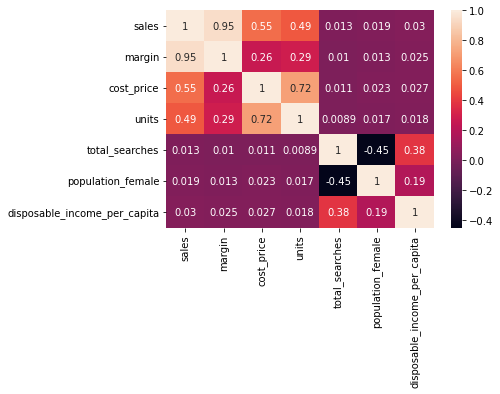

In [134]:
import seaborn as sns

sns.heatmap(cor,annot=True)


In [ ]:
# HYPOTHESIS:LOWER THE PRICE, LARGER THE NUMBER OF UNITS SOLD

8. HYPOTHESIS:LOWER THE PRICE, LARGER THE NUMBER OF UNITS SOLD

In [41]:
POS3=POS1[(POS1['class_name']=='REFINED DRESSES')]

In [42]:
POS1.groupby([POS1['class_name']=='REFINED DRESSES',POS1['subclass_name']=='WOVENS'])["sales"].sum()

class_name  subclass_name
False       False            1.239205e+08
            True             5.683666e+07
True        False            1.171239e+08
            True             2.924440e+07
Name: sales, dtype: float64

In [43]:

POS1['test']=POS1.groupby(['class_name','subclass_name'])["sales"].transform('sum').round(5)

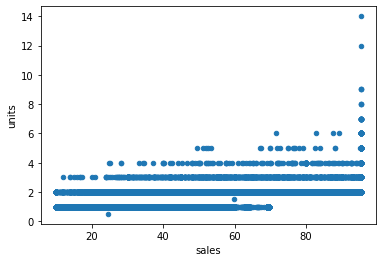

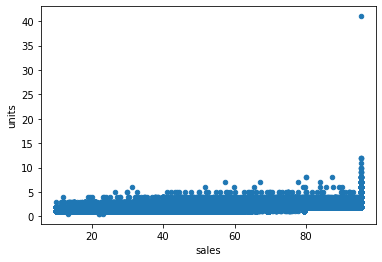

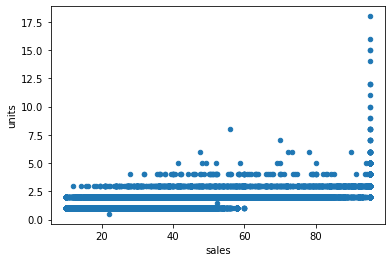

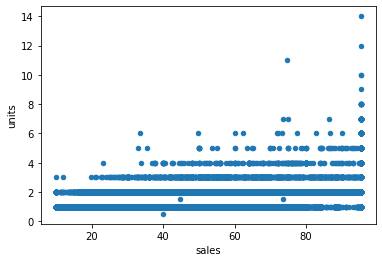

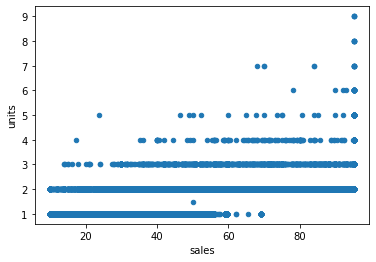

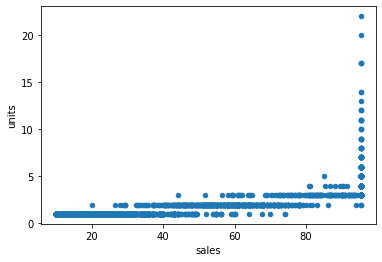

In [256]:
for i in POS1['class_name'].unique():
    print(i,'\n')
    POS1[POS1['class_name']==i][['sales','units']].plot(x='sales',y='units',kind='scatter')
    plt.show()

In [44]:
cat_sales2=POS1.groupby(['class_name','subclass_name']).agg({'sales_d':'sum','units':'sum'})

In [45]:
cat_sales2

sales_d      units
class_name                 subclass_name                          
CASUAL DRESSES             KNITS           1.122105e+07   343852.5
                           WOVENS          1.808352e+07   555781.0
DUMMY CLASS                DUMMY SUBCLASS  1.052063e+05     5938.0
REFINED DRESSES            KNITS           1.112894e+08  3303640.5
                           WOVENS          2.786725e+07   849598.5
SPECIAL OCCASION DAY       KNITS           8.630705e+06   261281.0
                           LACE            1.871204e+07   534262.0
                           WOVENS          1.631726e+07   537424.0
SPECIAL OCCASION EVENING   KNITS           2.835743e+07   747051.5
                           LACE            2.526326e+07   634322.0
                           WOVENS          1.953606e+07   514347.0
SPECIAL OCCASION SEPARATES BOTTOMS         6.730385e+06   218682.0
                           JACKETS         1.949866e+06    76059.0
                           TOPS            1.709343e+07   544812.0

STORE TYPE

In [ ]:
C:\Users\SrishtiNagu\Desktop\DDRS12\CAPSTONE\DATA\cleaned_data

In [46]:
POS1.groupby(POS1['store_type']).count()

,date,store_id,sku_id,online_flag,sales,units,margin,cost_price,sales_d,margin_d,...,percentage_race_native_indian,disposable_income_per_capita,median_household_income,total_searches,holiday_name,promotion_text,fp_nfp,year,month,test
store_type,,,,,,,,,,,,,,,,,,,,,
Downtown Store,218202,218202,218202,218202,218202,218202,218202,218202,218202,218202,...,218202,218202,218202,218202,218202,218202,218202,218202,218202,218202
Freestanding Store,43521,43521,43521,43521,43521,43521,43521,43521,43521,43521,...,43521,43521,43521,43521,43521,43521,43521,43521,43521,43521
Lifestyle Center,57803,57803,57803,57803,57803,57803,57803,57803,57803,57803,...,57803,57803,57803,57803,57803,57803,57803,57803,57803,57803
Mega Outlet Mall,188799,188799,188799,188799,188799,188799,188799,188799,188799,188799,...,188799,188799,188799,188799,188799,188799,188799,188799,188799,188799
Mini Mall,42994,42994,42994,42994,42994,42994,42994,42994,42994,42994,...,42994,42994,42994,42994,42994,42994,42994,42994,42994,42994
Outlet Mall,180661,180661,180661,180661,180661,180661,180661,180661,180661,180661,...,180661,180661,180661,180661,180661,180661,180661,180661,180661,180661
Outlet Strip,1291611,1291611,1291611,1291611,1291611,1291611,1291611,1291611,1291611,1291611,...,1291611,1291611,1291611,1291611,1291611,1291611,1291611,1291611,1291611,1291611
Power Strip,2637840,2637840,2637840,2637840,2637840,2637840,2637840,2637840,2637840,2637840,...,2637840,2637840,2637840,2637840,2637840,2637840,2637840,2637840,2637840,2637840
Regional Mall,397003,397003,397003,397003,397003,397003,397003,397003,397003,397003,...,397003,397003,397003,397003,397003,397003,397003,397003,397003,397003


In [31]:

cat_sales2.to_csv(r"C:\Users\SrishtiNagu\Desktop\DDRS12\CAPSTONE\DATA\cleaned_data\data_cat_sales2.csv")

In [ ]:
plt.figure(figsize=(20,5))
POS1.groupby(['class_name','subclass_name']).agg({'sales':'mean','units':'sum'})['sales'].plot()
plt.show()
plt.figure(figsize=(20,5))
POS1.groupby(['class_name','subclass_name']).agg({'sales':'mean','units':'sum'})['units'].plot()
plt.show()

In [ ]:
fp_new.to_csv(r"C:\Users\SrishtiNagu\Desktop\DDRS12\CAPSTONE\DATA\cleaned_data\data_fp_new.csv")

In [ ]:
fp_new.head()

,fashion_pyd_new,sales,units
0,10_1_5_knits_core,9.99,364.0
1,10_1_5_knits_core,10.00,2.0
2,10_1_5_knits_core,10.02,1.0
3,10_1_5_knits_core,10.04,1.0
4,10_1_5_knits_core,10.05,1.0


53 product categories

In [10]:
import pandas as pd
import numpy as np
fp_new=pd.read_csv(r'C:\Users\SrishtiNagu\Desktop\DDRS12\CAPSTONE\DATA\cleaned_data\data_fp_new.csv')

In [36]:
df_fp_new

,fashion_pyd_new,sales,units
0,10_1_5_knits_core,95.20,589.0
1,10_1_5_knits_fashion_driver,95.20,5955.0
2,10_1_5_knits_trend,95.20,406.0
3,10_1_6_wovens_core,95.20,1663.0
4,10_1_6_wovens_fashion_driver,95.20,7386.0
...,...,...,...
171979,10_5_52_jackets_core,9.99,116.0
171980,10_5_52_jackets_fashion_driver,9.99,617.0
171981,10_5_52_jackets_misc,9.99,19.0
171982,10_5_52_jackets_trend,9.99,379.0


In [ ]:
POS3=POS1[(POS1['subclass_name']=='WOVENS')]

In [17]:
knits_core=fp_new[(fp_new['fashion_pyd_new']=='10_1_5_knits_core')]

In [20]:
knits_core.to_csv(r'C:\Users\SrishtiNagu\Desktop\DDRS12\CAPSTONE\DATA\cleaned_data\fashion_pyramid\knits_core.csv')

cathcing categories according to class and sub class categories

In [47]:
try=POS1.groupby(['class_name']=='CASUAL DRESSES',['subclass_name']=='KNITS','sales_d'])['units'].sum()

SyntaxError: invalid syntax (<ipython-input-47-2da18d56c20a>, line 1)

In [49]:
try=POS1.groupby(['class_name','subclass_name','sales_d'])['units'].sum()

In [51]:
try.to_csv(r'C:\Users\SrishtiNagu\Desktop\DDRS12\CAPSTONE\DATA\cleaned_data\fashion_pyramid\product_sales_units.csv')

COST PRICE AND SALES

In [49]:
class_sales=POS1.groupby(["class_name"],as_index=False)["sales"].sum()

In [125]:
class_sales.to_csv(r'C:\Users\SrishtiNagu\Desktop\DDRS12\CAPSTONE\DATA\cleaned_data\fashion_pyramid\class_sales.csv')

In [50]:
class_sales

,class_name,sales
0,CASUAL DRESSES,3.095544e+07
1,DUMMY CLASS,1.475068e+05
2,REFINED DRESSES,1.463683e+08
3,SPECIAL OCCASION DAY,4.601368e+07
4,SPECIAL OCCASION EVENING,7.670571e+07
5,SPECIAL OCCASION SEPARATES,2.693480e+07


In [51]:
class_cost=POS1.groupby(["class_name"],as_index=False)["cost_price"].sum()

In [124]:
class_cost.to_csv(r'C:\Users\SrishtiNagu\Desktop\DDRS12\CAPSTONE\DATA\cleaned_data\fashion_pyramid\class_cost.csv')

In [52]:
class_cost

,class_name,cost_price
0,CASUAL DRESSES,1.502447e+07
1,DUMMY CLASS,1.144232e+05
2,REFINED DRESSES,6.780825e+07
3,SPECIAL OCCASION DAY,2.140460e+07
4,SPECIAL OCCASION EVENING,3.432019e+07
5,SPECIAL OCCASION SEPARATES,1.204496e+07


In [53]:
class_margin=POS1.groupby(["class_name"],as_index=False)["margin"].sum()

In [127]:
class_margin.to_csv(r'C:\Users\SrishtiNagu\Desktop\DDRS12\CAPSTONE\DATA\cleaned_data\fashion_pyramid\class_margin.csv')

In [30]:
tryall=df_POS1.groupby([df_POS1['store_type'],df_POS1['class_name']],as_index=False).agg({'sales_d':'mean','cost_price_d':'mean','margin_d':'mean','units':'sum'})

In [32]:
tryall.to_csv(r'C:\Users\SrishtiNagu\Desktop\DDRS12\CAPSTONE\DATA\cleaned_data\fashion_pyramid\class_storetype.csv')

In [12]:
try=POS1.groupby([df_POS1['store_type']=='strip store',df_POS1['class_name']=='CASUAL DRESSES'],as_index=False)["sales_d"].mean()

TRIAL for RECENT DEMAND

for one class to check

In [35]:
refined=POS1.groupby([POS1['class_name']=='REFINED DRESSES',df_POS1['year']])["units"].sum()

In [36]:
refined

class_name  year
False       2015     720390.0
            2016    1801647.0
            2017    1585445.0
            2018     866330.0
True        2015     541108.0
            2016    1509697.0
            2017    1475245.0
            2018     627189.0
Name: units, dtype: float64

FOR ALL THE CLASSES COMBINED

In [54]:
recent_demand=POS1.groupby([POS1['class_name'],POS1['year']])["units"].sum()

In [42]:
recent_demand.to_csv(r'C:\Users\SrishtiNagu\Desktop\DDRS12\CAPSTONE\DATA\cleaned_data\fashion_pyramid\recent_demand.csv')

Finding number of each store type---->> go to clean_db_store_file

In [55]:
state_avg_sales_d=POS1.groupby(['state'])["sales_d"].mean()

In [57]:
state_avg_sales_d.to_csv(r'C:\Users\SrishtiNagu\Desktop\DDRS12\CAPSTONE\DATA\cleaned_data\state_avgsalesd.csv')